In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
DF=pd.read_csv('Columbia_CLI.csv')
#DF_edited = pd.read_csv('/Users/liliyang/Desktop/Columbia Classes/Big Data/Datasets/Model_Ready_CLI.csv')

In [3]:
DF.shape

(999, 70)

,Total,Percent
inq_last_12m,999,100.000000
total_bal_il,999,100.000000
mths_since_last_major_derog,999,100.000000
annual_inc_joint,999,100.000000
dti_joint,999,100.000000
verification_status_joint,999,100.000000
tot_coll_amt,999,100.000000
tot_cur_bal,999,100.000000
open_il_6m,999,100.000000
open_il_12m,999,100.000000


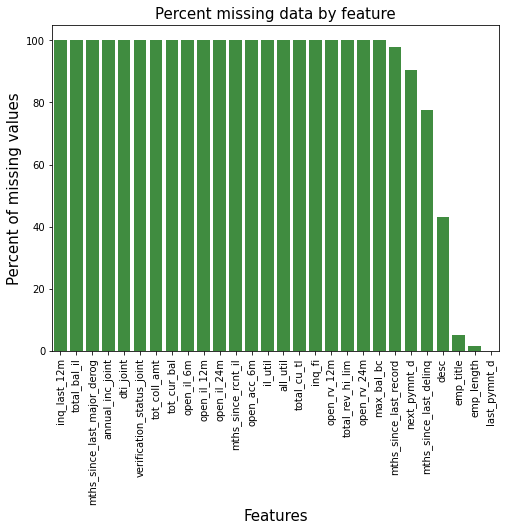

In [4]:
#Looking at the missing data

def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms
missingdata(DF)

In [5]:
missing_columns=['inq_last_12m', 'total_bal_il', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'open_acc_6m', 'il_util', 'all_util', 'total_cu_tl',
       'inq_fi', 'open_rv_12m', 'total_rev_hi_lim', 'open_rv_24m', 'max_bal_bc']
DF.drop(list(missing_columns), axis = 1, inplace=True)

In [6]:
#DF.nunique()
uniques = ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code',
           'application_type', 'acc_now_delinq']
DF.drop(list(uniques), axis = 1, inplace=True)

In [7]:
df = DF.drop(['next_pymnt_d', 'desc', 'id', 'member_id'], axis = 1)

In [8]:
df.info(), df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CLI                      999 non-null    int64  
 1   term                     999 non-null    object 
 2   int_rate                 999 non-null    float64
 3   installment              999 non-null    float64
 4   grade                    999 non-null    object 
 5   sub_grade                999 non-null    object 
 6   emp_title                948 non-null    object 
 7   emp_length               982 non-null    object 
 8   home_ownership           999 non-null    object 
 9   annual_inc               999 non-null    float64
 10  verification_status      999 non-null    object 
 11  loan_status              999 non-null    object 
 12  purpose                  999 non-null    object 
 13  title                    999 non-null    object 
 14  zip_code                 9

(None,
 CLI                        250
 term                         2
 int_rate                    34
 installment                720
 grade                        7
 sub_grade                   34
 emp_title                  918
 emp_length                  11
 home_ownership               3
 annual_inc                 283
 verification_status          3
 loan_status                  5
 purpose                     13
 title                      543
 zip_code                   378
 addr_state                  42
 dti                        823
 delinq_2yrs                  4
 earliest_cr_line           268
 inq_last_6mths               6
 mths_since_last_delinq      76
 mths_since_last_record      17
 open_acc                    24
 pub_rec                      2
 revol_bal                  979
 revol_util                 566
 total_acc                   54
 out_prncp                   95
 out_prncp_inv               95
 total_pymnt                997
 total_pymnt_inv            997
 

In [9]:
df['emp_length'] = df['emp_length'].str.strip(' years')
df['emp_length'] = df['emp_length'].str.strip(' year')
df['emp_length'][df['emp_length'] == '10+'] = '10'
df['emp_length'][df['emp_length'] == '< 1'] = '0'

In [10]:
df['emp_length'].unique()

array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7', nan],
      dtype=object)

In [11]:
df['mths_since_last_delinq'].fillna(df['mths_since_last_delinq'].mode()[0], inplace = True)
df['mths_since_last_record'].fillna(df['mths_since_last_record'].mode()[0], inplace = True)
df['last_pymnt_d'].fillna(df['last_pymnt_d'].mode()[0], inplace = True)
df['emp_length'].fillna(df['emp_length'].mode()[0], inplace = True)
df['emp_length'] = df['emp_length'].astype('int')

In [12]:
df.drop(['emp_title', 'sub_grade', 'title', 'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'], axis = 1, inplace=True)

In [13]:
df['zip_code'] = df['zip_code'].str.strip('xx')
df['zip_code'] = df['zip_code'].astype('int')

In [14]:
df['loan_status'].value_counts()
df[df['loan_status'] == 'Late (31-120 days)']
df.drop([749,607], axis = 0, inplace = True)

In [15]:
df['loan_status'] = df['loan_status'].str.replace('Fully Paid','1')
df['loan_status'] = df['loan_status'].str.replace('Charged Off','0')
df['loan_status'] = df['loan_status'].str.replace('Default','0')
df['loan_status'] = df['loan_status'].str.replace('Current','1')
df['loan_status'] = df['loan_status'].astype('int')

In [16]:
df.to_csv('grade_Cleaned_data_before_num.csv')